# **BACKGROUND**

DQLab Sports Center is a store that sells sports equipment such as jackets, clothing, bags, and shoes. This shop began selling in 2013, so it has had regular customers for a long time and is still attempting to attract new customers to this day.

At the beginning of 2019, The Store Manager hired a junior Data Analyst to assist him in resolving a problem in his store, namely a decrease in customer returns. The store manager defines churn as a customer who has not made a transaction at the store in the last 6 months from the most recent available data update.

The store manager also provided transaction data from 2013 to 2019 in CSV (comma-separated value) format in the form of data_retail.csv, which contained 100,000 rows of data.

# **PROBLEM STATEMENT**

The Store Manager wants to resolving a problem in his store, namely a decrease in customer returns. The store manager defines churn as a customer who has not made a transaction at the store in the last 6 months from the most recent available data update.

# **BUSINESS OBJECTIVE**

The Store Manager wants to know which are identified as churn customers (*customer who has not made a transaction at the store in the last 6 months from the most recent available data update*).

# **ANALYSIS OBJECTIVE**

Create a model that can accurately predict at least 60% of customers that are identified as churn customers (*Accuracy, Precision, and Recall above 60%*).

# **DATASET INFORMATION**

The data contains the following fields:

* No
* Row_Num
* Customer_ID
* Products
* First_Transaction
* Last_Transaction
* Average_Transaction_Amount
* Count_Transaction

# **DATA PREPARATION**

* **Importing Data**: Import data_retail.csv into the Python environment.
* **Cleaning Data**: Cleaning and modifying data so that it is ready to be used for further analysis.

## [1] Importing and Inspection Data
Import the dataset from *https://storage.googleapis.com/dqlab-dataset/data_retail.csv* and then inspect it.

* Print top 5 data.
* Get dataset information.


In [19]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [20]:
print('Top 5 Data:')
df.head()

Top 5 Data:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [21]:
print('\nDataset Info:')
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


## [2] Data Cleansing
The two columns that indicate the occurrence of transactions are not of the **DateTime** data type (**int64**), so these two columns are changed to the **DateTime** data type. Then the top 5 data from the df data frame, as well as the data types of each column, are reprinted.

In [22]:
# First_Transaction Column
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Last_Transaction Column
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [23]:
print('Top 5 Data:')
df.head()

Top 5 Data:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [24]:
print('\nDataset Info:')
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


## [3] Churn Customers
Look for the following to determine customer churn according to the definition provided:

* When was the last transaction done.
* Determine which customers are churning and which are not.

Then print the top 5 data and dataset information.



In [25]:
print(max(df['Last_Transaction']))

# Classify customers who have churn status or not with Booleans
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

2019-02-01 23:57:57.286000128


In [26]:
print('Top 5 Data:')
df.head()

Top 5 Data:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [27]:
print('\nDataset Info:')
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


## [4] Delete Unnecessary Columns
Based on the columns in the dataset, it appears that the **no** and **Row_Num** columns are unnecessary because they have no effect on the data analysis process and only serve as indexes/row numbering.

In [28]:
# Delete columns that are unnecessary
del df['no']
del df['Row_Num']

In [29]:
print('Top 5 Data:')
df.head()

Top 5 Data:


,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [30]:
print('\nDataset Info:')
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


# **DATA UNDERSRTANDING WITH VISUALIZATION**

Get insight from the visualization results that have been created.

## [5] Data Visualization of Customer acquisition by Year
The following step is to use a bar chart to create a data visualization of a customer acquisition trend by year. As a result, before performing the visualization, add additional features/columns that represent the year of the **First_Transaction** and the year of the **Last_Transaction**, respectively, with the names **Year_First_Transaction** and **Year_Last_Transaction**.


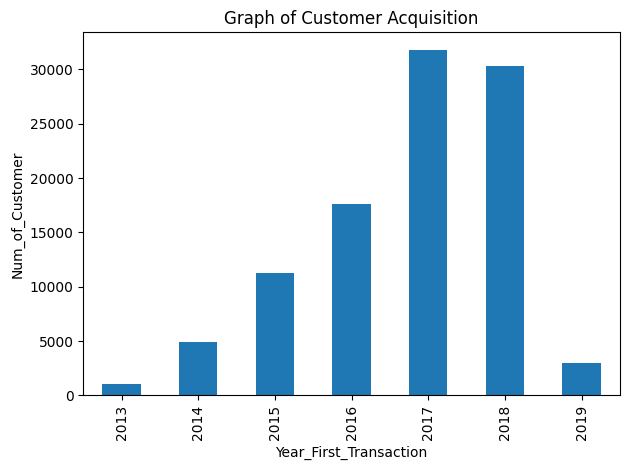

In [31]:
import matplotlib.pyplot as plt

df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## [6] Data Visualization of Transaction by Year
Then, using a bar chart to depict the trend in the number of transactions per year.

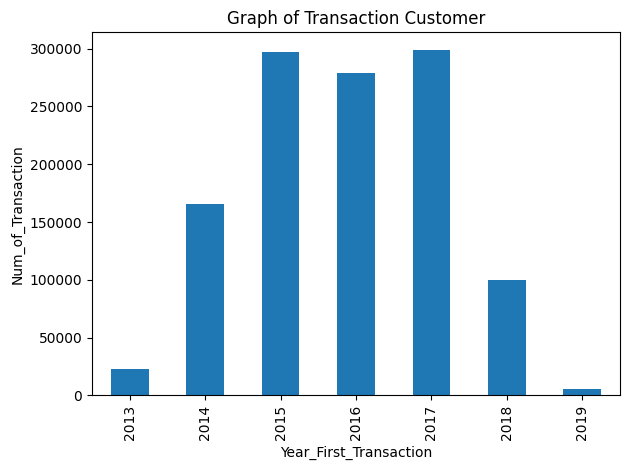

In [32]:
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

## [7] Data Visualization of Average Transaction Amount by Year
After that, visualize the year-on-year trend in the average number of transactions for each product using the Seaborn Point Plot.


<ipython-input-33-50aeaec16757>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(data = df.groupby(['Year_First_Transaction', 'Product']).mean().reset_index(),


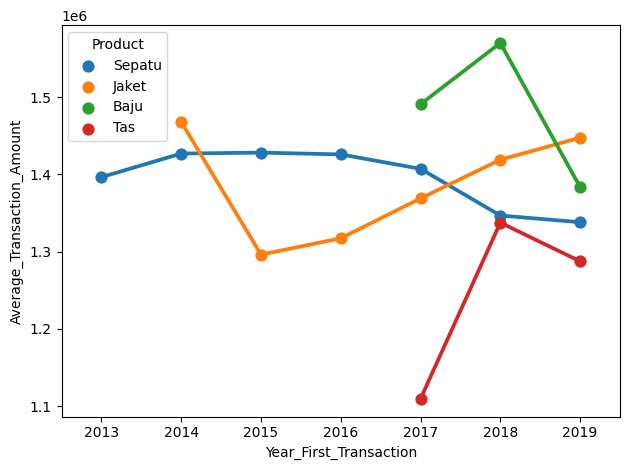

In [33]:
import seaborn as sns

sns.pointplot(data = df.groupby(['Year_First_Transaction', 'Product']).mean().reset_index(),
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.show()

## [8] Proportion of Churned Customers for Each Product
A pie chart can provide insight into churned customers, particularly the proportion of churned customers for each product. Create the pie chart for the four products.

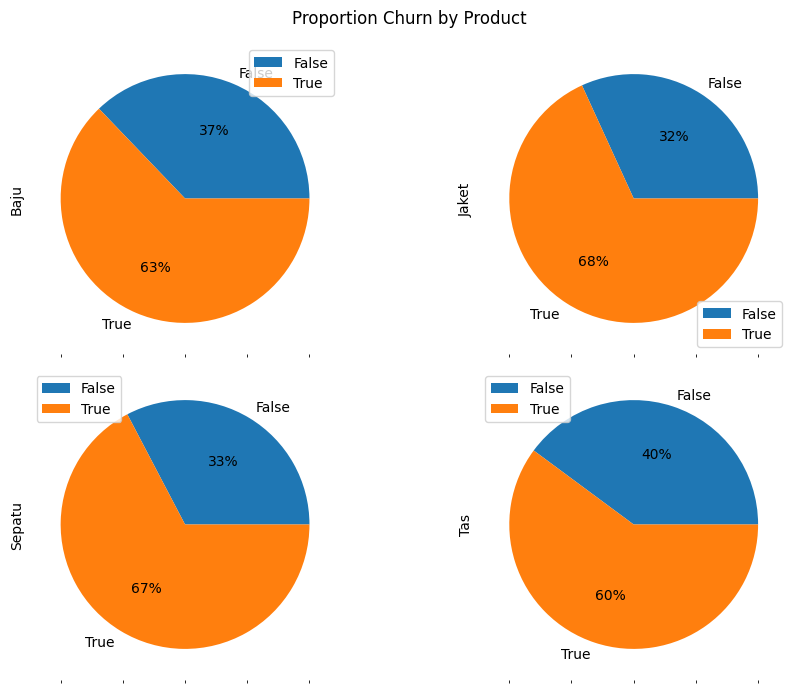

In [34]:
# Create a pivot table
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)
# Get Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot Pie the Chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

## [9] Distribution of Transaction Count Categorization
 Next, the categorization distribution of the number of transactions will be visualized. This classification is accomplished by grouping the number of transactions, as shown in the table below:

 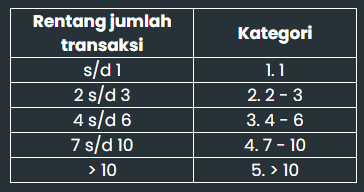

 After adding a new column for this category with the name **Count_Transaction_Group**, visualize it with a bar chart.

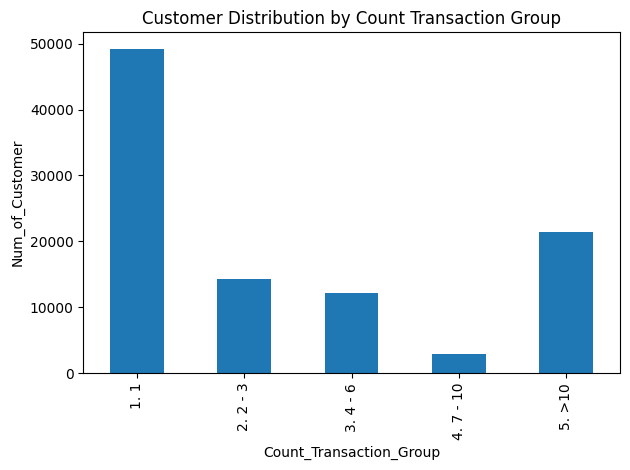

In [35]:
# Group of number of transaction
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Add new column
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## [10] Distribution of Average Transaction Amount Categorization
The categorization distribution of the number of average amount transactions will be visualized. This classification is accomplished by grouping the average amount transactions, as shown in the table below:

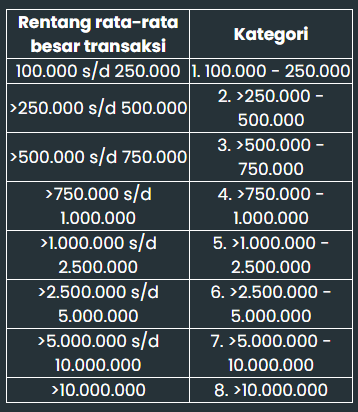

 After adding a new column for this category with the name **Average_Transaction_Amount_Group**, visualize it with a bar chart.

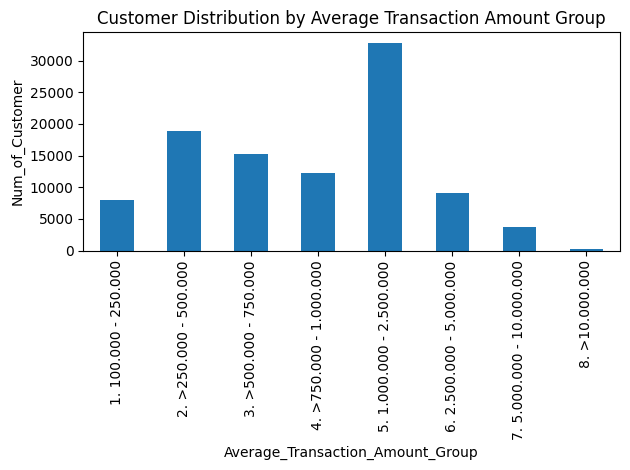

In [36]:
# Group of average amount transaction
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >= 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >= 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >= 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >= 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. 1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >= 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. 2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >= 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. 5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Add new column
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# **MODELING & EVALUATION**

Get insight from the model and evaluate the model that has been created and tested.

## [11] Feature Columns and Target for Modelling
The feature columns are determined from the existing dataset at this stage. Columns **Average_Transaction_Amount**, **Count_Transaction**, and **Year_Diff** were chosen. The last column, however, does not yet exist. So, the **Year_Diff** column will be formed, and the dataset will be assigned with this feature column as the independent variable X.
Assign the dataset for this target to the dependent variable Y, regardless of whether the consumer is churning or not (**is_churn** column).

In [37]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# List of feature column
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

## [12] Split X and Y into Training and Testing Sections
After assigning the independent variable X and the dependent variable Y, X and Y are separated into training and testing parts The testing part consists of 25% of the total number of data entries.

In [38]:
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns]
y = df['is_churn'].astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## [13] Train, Predict and Evaluate
The next step is to create a model using Logistic Regression, initialize the model, fit it, and then evaluate the model using a Confusion Matrix.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Initialize model logreg
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluate model use Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


## [14] Confusion Matrix Visualization
The previously calculated Confusion Matrix can be visualized using a heatmap from Seaborn.

<Figure size 640x480 with 0 Axes>

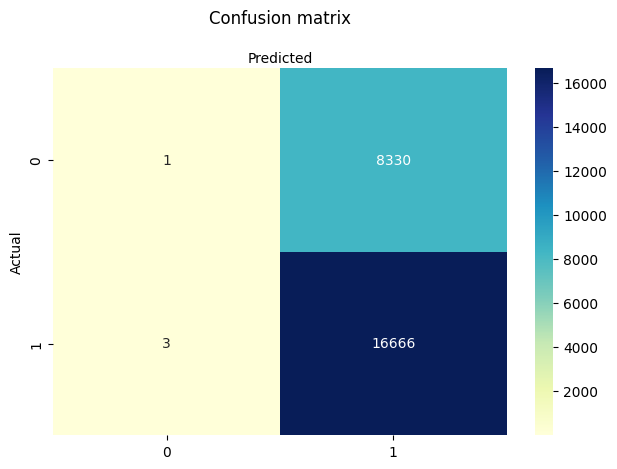

In [40]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# Name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## [15] Accuracy, Precision, and Recall
Calculate accuracy, precision, and recall values based on the actual target value and predicted target value.

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Calculate Accuracy, Precision, and Recall
print('Accuracy  :', accuracy_score(y_test, y_pred))
print('Precision :', precision_score(y_test, y_pred, average='micro'))
print('Recall    :', recall_score(y_test, y_pred, average='micro'))

Accuracy  : 0.66668
Precision : 0.66668
Recall    : 0.66668


# **CONCLUSION**

Based on modeling and evaluation, as well as the results of the confusion matrix above, it is possible to conclude that the model developed is quite good and capable of solving existing business problems.